                                                               Project Report : MAT003 - Introduction to Machine Learning 
                                                               Neeraj Kumar / Saiteja Pottanigari

# Problem Statement
Predict class of Economic losses caused by Forest Fires using SVM, Random Forest, MLP and Logistics regression. Economic losses have been categorized into 3 classes: 0, 1, 2 and we want to predict the output class based on the dataset features. 
As Forest fires effects economics loss of any country in the world, building a model which takes features of forest fires and predicting how much it will effect the economic and let the government be ready for the range of impact either it is high or medium or low.

## Multiclass Problem
As it is a multiclass problem with output label holding 3 classes(0, 1, 2). We can take 2 approaches for solving this problem. 

### One Vs Rest (One Vs All)
Here we use mulitple binary classifer which is compare each class with rest of the classes available being one label.
**Decision rule**:Predict class label with the highest probability. 
Requires n classifiers if n number of classes exist.

### One Vs One
In this we have to train binary classifier for each class pair. 
**Decision rule**:Score for output a data item towards one class, combines all classifier's probability involving this class in the class pairs. Requires nC2 classfiers if n number of classes exist.

For current problem, we are choosing One Vs Rest approach because of two reasons
a) Dataset is limited (500 samples) so we want to use all samples for each classifier. 
b) Number of classes are limited to 3, so number of classifiers will be same in both cases.



# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import math
from random import seed
from random import randrange
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
__file__ = 'dataset22.csv'
my_absolute_dirpath = os.path.abspath(os.path.dirname(__file__))
filename = my_absolute_dirpath+'\\dataset22.csv'
# as the Dataset given was not truly comma-seperated we had to use different seperator
df = pd.read_csv(filename,sep=';')

## Brief Description of Dataset


### FOREST FIRES DATASET


Dataset description:
The data is compiled from forest fires classified according to the economic losses that they caused. There are thirteen different features associated with each fire. The goal is to predict the economic losses range (feature "class") from the other features.

	Number of samples: 500
	Number of features: 13 (numeric and strings) + one column of class labels (0,1,2)
	Features description:
		fwi: Fire weather index
		humidity: Absolute humidity in g/m3
		region: region
		dc: Drought code
		wind: Average wind speed in km/h
		month: Month of the year at start
		area: Burned area in km2
		rain: Outside rain in mm/m2
		nr_firefighters: Number of firefighters employed per day
		severity_rating: severity_rating
		temperature: Temperature in Celsius degree
		fire_id: Fire ID
		duration: Month till extinguishment
		class: Economic losses (0 = low, 1 = medium, 2 = high) <--- LABEL TO PREDICT

In [3]:
df.head()

,fwi,humidity,region,dc,wind,month,area,rain,nr_firefighters,severity_rating,temperature,fire_id,duration,class
0,0.841679,3.141911,east,0.463125,1.043834,3.412090,11.899575,2.885231,110.855503,low,19.977044,MK54991,1.146850,0
1,1.095804,2.171241,south,0.488669,0.904983,1.411064,12.382215,2.391467,100.200825,low,19.363609,MK59610,3.107490,2
2,1.044402,2.568339,east,0.523094,2.328438,2.275867,14.169619,2.388992,104.364864,medium,19.848332,MK85136,0.502376,1
3,1.253356,1.876798,west,0.395123,1.928353,4.395224,11.994655,2.865763,139.849117,medium,19.973640,MK65663,1.112743,0
4,0.580425,1.788110,west,0.227760,0.789123,4.694190,11.858733,2.687807,96.699321,medium,19.667874,MK70998,2.273318,0


In [4]:
df.describe()
print("Shape:", df.shape)
print("Data Types:", df.dtypes)

Shape: (499, 14)
Data Types: fwi                float64
humidity           float64
region              object
dc                 float64
wind               float64
month              float64
area               float64
rain               float64
nr_firefighters    float64
severity_rating     object
temperature        float64
fire_id             object
duration           float64
class                int64
dtype: object


# Find Correlation between features
Class has the highest correlation with temprature(which is a negative correlation), followed by Rain, also a negative correlation. Highest positive corelation is with variable 'Duration' 

In [5]:
print("Correlation:", df.corr(method='pearson'))

Correlation:                       fwi  humidity        dc      wind     month      area  \
fwi              1.000000 -0.024212 -0.009441  0.033670  0.000122 -0.021439   
humidity        -0.024212  1.000000  0.063900  0.032255 -0.076410 -0.010921   
dc              -0.009441  0.063900  1.000000  0.047147 -0.058331 -0.049856   
wind             0.033670  0.032255  0.047147  1.000000  0.012248 -0.045665   
month            0.000122 -0.076410 -0.058331  0.012248  1.000000 -0.015261   
area            -0.021439 -0.010921 -0.049856 -0.045665 -0.015261  1.000000   
rain             0.003020  0.049802  0.052359  0.087848  0.002740 -0.375837   
nr_firefighters  0.055794 -0.008467  0.007279  0.032634 -0.045389 -0.033011   
temperature     -0.013179  0.041435  0.014555  0.053132 -0.008831  0.380924   
duration         0.017791 -0.031233  0.003518 -0.030083  0.012184 -0.633577   
class           -0.029620 -0.029536 -0.010342 -0.007539 -0.039007 -0.048053   

                     rain  nr_firefigh

# Features Distribution
Temprature, Wind, Firefigther, Rain and Humidity have a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E7420A888>,
      dtype=object)

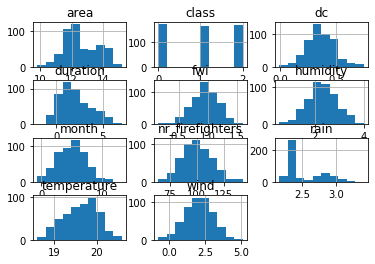

In [6]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E74242588>,
      dtype=object)

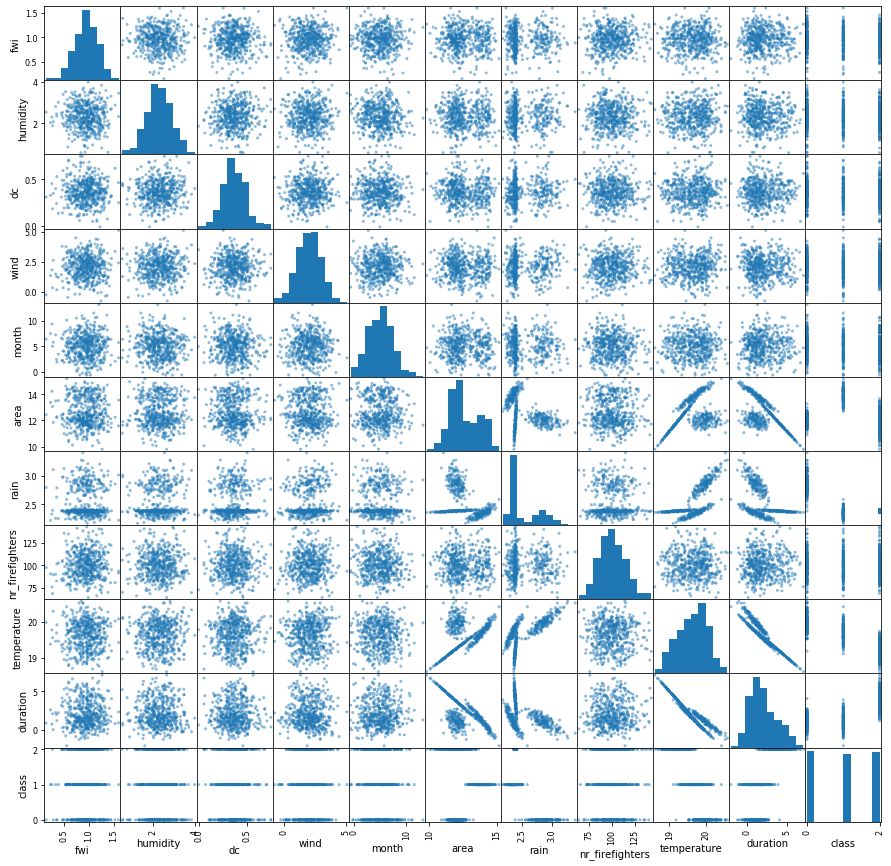

In [7]:
scatter_matrix(df,figsize  = [15, 15])

## Feature selection
The features are as follows:
1. FWI - Fire weather index
2. humidity -  Absolute humidity in g/m3
3. region - Region
4. dc - Drought Code
5. Wind - Average wind speed in km/h
6. Month - Month of the year at start
7. Area - Burned area in km2
8. Rain - Outside rain in mm/m2
9. nr_firefighters - Number of firefighters employed per day
10. severity_rating - Severity_rating 
11. temperature - Temperature in Celsius degree
12. fire_id - Fire ID
13. duration - Month till extinguishment
14. class - Economic losses (0 = low, 1 = medium, 2 = high)


We notice that:

 - the 'Class' column is the column of our labels, it's not a feature!
 - Fire Id can be meaningful, but cannot be readily translated into real numbers. Also it would not be possible to establish a relation ship between output class and fire id.
 - We are going to use all features except fire_id


### Data preprocessing
We are going to do following data processing steps
 
 - Drop Fire_Id column as this feature cannot be corelated with the output class. It will be really difficult to find corelation between Ids and Output class
 - Replace missing values with the mean value for the corresponding column. 
 - We are going to convert the feature 'Region' to 3 features using one hot encoding, region_east, region_south, region_west.
 - We are going to convert categorical feature 'Severity rating' to a numeric range(0, 1, 2), as these is an ordered relationship between low, high and medium. 
 - Since variance in scale of various attributes in the dataset is quite small,  we decided not to do standardization.

In [8]:
# Drop fire_id
df.drop(['fire_id'],axis=1, inplace = True)
# Replace missing values by average value of the column
df.fillna(df.mean(), inplace = True)

**Label encoding**

In [9]:
# Enocode Severity rating as a numerical feature
enc = LabelEncoder()
enc.fit(df['severity_rating'])
df['severity_rating_encoded']=enc.transform(df['severity_rating'])
df.drop(['severity_rating'],axis=1, inplace = True)

**One hot encoding**

In [10]:
#Encode Region feature as one hot encoded, 3 features, region_east, region_south, region_west
df = pd.get_dummies(df, prefix_sep='_', drop_first=False)

In [11]:
df.head()

,fwi,humidity,dc,wind,month,area,rain,nr_firefighters,temperature,duration,class,severity_rating_encoded,region_east,region_south,region_west
0,0.841679,3.141911,0.463125,1.043834,3.412090,11.899575,2.885231,110.855503,19.977044,1.146850,0,1,1,0,0
1,1.095804,2.171241,0.488669,0.904983,1.411064,12.382215,2.391467,100.200825,19.363609,3.107490,2,1,0,1,0
2,1.044402,2.568339,0.523094,2.328438,2.275867,14.169619,2.388992,104.364864,19.848332,0.502376,1,2,1,0,0
3,1.253356,1.876798,0.395123,1.928353,4.395224,11.994655,2.865763,139.849117,19.973640,1.112743,0,2,0,0,1
4,0.580425,1.788110,0.227760,0.789123,4.694190,11.858733,2.687807,96.699321,19.667874,2.273318,0,2,0,0,1


### Train-Test Split

 - We split the data set into training and testing data in ration of 85 to 15 percent
 - Since we have a small dataset, we will use cross validation instead of reseving a percentage of dataset for validation

In [12]:
Xtrain_df, Xtest_df = train_test_split(df, test_size=0.15)

In [13]:
Xtrain_df

,fwi,humidity,dc,wind,month,area,rain,nr_firefighters,temperature,duration,class,severity_rating_encoded,region_east,region_south,region_west
418,0.906084,0.907940,0.121938,1.732688,4.354972,11.975013,2.873145,85.075973,19.979416,1.101635,0,2,0,1,0
241,0.574003,2.159146,0.196584,3.191822,6.026565,12.153274,2.388476,90.955120,19.296530,3.459038,2,1,0,1,0
62,1.005581,1.819418,0.685011,1.340092,2.928660,12.652340,2.384794,107.004174,19.427356,2.747816,2,2,0,0,1
65,0.720265,1.885784,0.390630,1.380132,5.423316,12.314644,2.866176,121.242897,20.061710,0.641738,0,1,0,1,0
428,0.724594,1.770018,0.472877,1.435859,6.381096,12.596417,2.383374,113.446502,19.409930,2.837415,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.948011,1.489426,0.232097,3.180089,3.765747,11.704933,2.831696,108.844808,19.843042,1.721230,0,0,0,0,1
218,1.016891,2.906367,0.412452,1.216462,5.876100,12.510236,2.814372,74.660486,20.036963,0.635089,0,2,0,1,0
493,0.776655,2.850578,0.216103,2.281625,3.702847,12.395452,2.772005,89.916918,19.941643,1.032141,0,2,0,0,1
248,0.962724,2.608517,0.166745,1.552006,-0.650817,14.452270,2.369519,107.451646,19.896181,0.193506,1,2,0,0,1


### Training Data Set Split

 - As we need to solve a multiclass problem, we have decided to use One Vs Rest Approach. 
 - First DataSet will have samples with class value 0, being labeled as 1, and other two classes are labeled as 0
 - Second DataSet will have samples with class value 1, being labeled as 1, and other two classes are labeled as 0
 - Third DataSet will have samples with class value 2, labeled as 1, and other two classes are labeled as 0
 
 Basically each dataset will have identify one of the class as positive(labeled as 1) and other two classes as negative(labeled as 0)

In [14]:
Xtrain_df.shape

(424, 15)

### This function creates numpy arrays for training and test samples. 
For training samples, we create 3 numpy arrays corresponidng to 3 classes. As we are using One Vs All model, we need to train 3 classifiers. 
 - y0_train : label space which identies class 0 as postive instance, and classes 1 and 2 as negative. 
 - y1_train : label space which identies class 1 as postive instance, and classes 0 and 2 as negative.
 - y2_train : label space which identies class 2 as postive instance, and classes 0 and 1 as negative.
 

In [15]:
def create_ovr_test_data_set(Xtrain_df,Xtest_df):
    
    Xtrain_df.reset_index(drop=True, inplace = True)
    Xtest_df.reset_index(drop=True, inplace = True)
    X0_df = Xtrain_df.copy()
    X1_df = Xtrain_df.copy()
    X2_df = Xtrain_df.copy()
    # Convert class 1 and 2 to negative(label 0), and class 0 to positive(label 1)
    X0_df['class'] = X0_df['class'].replace(1, 2)
    X0_df['class'] = X0_df['class'].replace(0, 1)
    X0_df['class'] = X0_df['class'].replace(2, 0)
    # Convert class 0 and 2 to negative(label 0), and class 1 to positive(label 1)
    X1_df['class'] = X1_df['class'].replace(2, 0)
    # Convert class 0 and 1 to negative(label 0), and class 2 to positive(label 1)
    X2_df['class'] = X2_df['class'].replace(1, 0)
    X2_df['class'] = X2_df['class'].replace(2, 1)
    

    X_train=X0_df.drop(['class'],axis=1)

    y0_train=X0_df['class']

    y1_train=X1_df['class']

    y2_train=X2_df['class']

    y_train =  Xtrain_df['class'].copy()

    y_test = Xtest_df['class'].copy()
    X_test=  Xtest_df.drop(['class'],axis=1)
    
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    y0_train = y0_train.to_numpy()
    y1_train = y1_train.to_numpy()
    y2_train = y2_train.to_numpy()
    y_test = y_test.to_numpy()
    y_train = y_train.to_numpy()
    return(X_train, X_test, y0_train, y1_train, y2_train,y_train,y_test)


In [16]:
X_train, X_test, y0_train, y1_train, y2_train,y_train,y_test  = create_ovr_test_data_set(Xtrain_df, Xtest_df)

# Model Implementation

We are going to implement following Models

####  Random Forest( Implemented in the notebook)
####  Decision Tree ( Implemented in the notebook)
####  Decision Tree( From SK Learn)
####  SVM( From SK Learn)
####  Logistics Regression
####  Multilayer Perceptron

### Decision Tree 
Contains following main functions

1. gain() : Calculates the information gain for each split
2. all_features : Build the feature set from dataset columns
3. decision_tree_predict_prob() : Returns the output label probability 
4. decision_tree_train : Implementes decison tree logic

Random Forest is a bootstrapped aggregated decision tree where we use boostrapped training data in multiple decision tree and we aggregate them by soft voting procedure. Internally, in Decision Tree we have used Iterative Dichotomiser 3 algorithm we are picking the best split by information gain logic 
$$\text{Gain}(S,j,c) = C(\mathbb{P}_S(y=1)) - \Bigl( \mathbb{P}_S(x^{(j)} \le c) * C(\mathbb{P}_S(y=1|x^{(j)}\le c)) + \mathbb{P}_S(x^{(j)}> c) * C(\mathbb{P}_S(y=1|x^{(j)} > c)) \Bigr)$$
And the gain error by using $$C(a) = −a\log(a) − (1−a)\log(1−a)$$ 
on the feature subset extracted from Sampling data. We have predicted the probability of class between any two classes denoted labels (Y) $\displaystyle  \mathcal{Y} ∈ $  {0,1}.

In [17]:
''' 
This function is used for finding out the best split by the giving the error 
value at this split value 'c' for x at this particular feature. 
'''

def gain(x, y, j, c):
    
    def error(x):
        if x==0:
            return 0
        if x==1:
            return 0
        else:
            return -x * math.log(x) - (1 - x) * math.log(1 - x)

    split = x[:, j] <= c
    if all(split):
        return 0
    if all(np.logical_not(split)):
        return 0
    error_old = error(np.mean(y))
    error_new = np.mean(split) * error(np.mean(y[split])) + (1 - np.mean(split)) * error(np.mean(y[np.logical_not(split)]))
    return error_old - error_new


'''
In this we are making a feature subset for individual feature, 
by taking average at every two data point which is used in future as 
split point 
'''
def all_features(x):
    
    n, d = x.shape
    feature_set = []
    for j in range(d):
        x_j_sorted = np.sort(x[:, j])
        for i in range(n-1):
            feature_set.append([j, (x_j_sorted[i+1]+x_j_sorted[i])/2])
    return feature_set

'''
Predicts probablitity for the output label.
'''

def decision_tree_predict_prob(x, tree):
    def decision_tree_predict_prob_el(x_i, tree):
        if len(tree) == 1:
            return tree[0]
        else:
            j = tree[0][0]
            c = tree[0][1]
            if x_i[j] <= c:
                return decision_tree_predict_prob_el(x_i, tree[2])
            else:
                return decision_tree_predict_prob_el(x_i, tree[3])
    prediction = np.array([])
    for x_i in x:
        prediction = np.append(prediction, decision_tree_predict_prob_el(x_i, tree))
    return prediction


def decision_tree_predict_label(x, tree):
    return np.rint(decision_tree_predict_prob(x, tree))


def zero_one_loss(y_true, y_pred):
    n = y_true.shape[0]
    return (1/n) * np.sum(y_true != y_pred)


def log_loss(y_true, y_pred):
    n = y_true.shape[0]
    result = np.zeros(n)
    y_zero = y_true == 0
    result[y_zero] = -np.log(1-y_pred[y_zero])
    y_one = y_true == 1
    result[y_one] = -np.log(y_pred[y_one])
    return np.mean(result)


''' 
Here initially we are checking if we have only one label or we have good stratification.
then checked if the Feature-set is empty or filled because thats most important to 
create the Best Split of the label at particular feature. We internally call gain function to obtain the best split and 
make the model have best split value for each feature that if certain feature's value is lower the value is given to a label
if greater then it is assigned with another label
'''
def decision_tree_train(x, y, feature_set, max_depth = math.inf):
    
    
    if np.mean(y) == 1:  # Check if all examples have same label
        return [1]
    if np.mean(y) == 0:  # Check if all examples have same label
        return [0]
    if not feature_set:  # Check if no feature left to split
        return [np.mean(y)]
    
    # Stop if max_depth reached 0
    if max_depth <= 0:
        return [np.mean(y)]
    else:
        max_depth -= 1

    # Calculate best index to split
    best_split = []
    best_split_gain = 0
    for new_split in feature_set:  # Find best split point
        new_gain = gain(x, y, *new_split)
        if new_gain > best_split_gain:
            best_split = new_split
            best_split_gain = new_gain
    if best_split_gain == 0:
        return [np.mean(y)]
    split = x[:, best_split[0]] <= best_split[1]

    # Update samples
    x_new_one = x[split, :]
    x_new_two = x[np.logical_not(split), :]
    y_new_one = y[split]
    y_new_two = y[np.logical_not(split)]
    feature_set.remove(best_split)
    return [best_split, best_split_gain, decision_tree_train(x_new_one, y_new_one, feature_set, max_depth), decision_tree_train(x_new_two, y_new_two, feature_set, max_depth)]


## Random Forest
This section has 3 main functions. 
### sample_bootstrap()
Create bootstrap sampling of Dataset  That is, from our n_samples(length of dataset) data points, we  repeatedly draw an example randomly with replacement (meaning the same sample can be picked multiple times), n_samples times.
### create_new_feature_set()
Create a new feature set by randomly choosing the features from feature set of all features. Number of features will be selected by the parameter n_features
### predict_random_forest_output_prob()
Average the output probabilities from all the trees in the random forest to return the predict label probability of random forest
### Random_forest()
Create a random forest classfier with sample bootstrap and random nu of features. Please look at the function definiton for more details.

In [18]:
'''
 Take as input probability output of 3 classfiers coressponding to each class( We have 3 classes and 
 one classfier corresponding to each class )
 Predict the class label which have the highest probability 
 Return the class label corresponding to class which have highest probablity
'''
def give_ovr_class_label_output(clf1_prob, clf2_prob, clf3_prob):
    '''
    Stack 3 probabilities to get a numpy array 
    '''
    yclass= np.hstack((clf1_prob, clf2_prob,clf3_prob))
    y_class = np.array( yclass )
    '''
    Get the index corresponding to the max value of column
    '''
    idx = np.argmax(y_class, axis=-1)
    y_class = np.zeros(y_class.shape )
    '''
    Convert the one hot position into class label
    '''
    y_class[ np.arange(y_class.shape[0]), idx] = 1
    y_train_pred = np.argmax(y_class, axis=1)
    return y_train_pred

'''
Predict the output label probablity of random forest by averaging out the output probabilites from 
all the trees defined for the forest.
'''

def predict_random_forest_output_prob(x, forest_tree_list):
    
    [n,d] = x.shape
 
    i = 0
    for tree in forest_tree_list:
        '''
        Get output probablity of individual tree
        '''
        prob = decision_tree_predict_prob(x, tree)
        if i == 0 :
            i =1
            y_prob  = prob.reshape(n, 1)
           
        else:
            '''
            Stack output proabitlies from individual tree to a np array
            '''
            y_prob= np.hstack((y_prob,prob.reshape(n, 1)))
         
    '''
    Predict output probablity by averaging the probablities from all trees 
    '''    
    y_prob = np.mean(y_prob, axis=1)
    return y_prob
'''
 Create bootstrap sampling of Dataset
 That is, from our n_samples(length of dataset) data points, we
 repeatedly draw an example randomly with replacement (meaning the same sample can be
 picked multiple times), n_samples times.
'''
def sample_bootstrap(Dataset):
    n_sample = []
    while len(n_sample) < len(Dataset):
        '''
        Randomly pick an a point from dataset and append it to new dataset
        '''
        index = randrange(len(Dataset))
        n_sample.append(Dataset[index])
        
    '''
    Convert the list back to np array
    '''
    return (np.stack( n_sample, axis=0 ))

'''
Create a new feature set by randomly choosing the features. 
n_features : Defines the nu of features that should be used for new feature set. 
DataSet : Get the range of features from the dataset column length
'''

def create_new_feature_set(n_features, DataSet, feature_set):
    features = []
    n,d = DataSet.shape
    if n_features > d:
        n_features = d
    
    while len(features) < n_features:
        '''
         Append a feature from original feature set depending on random index between 0 -13
         where 14 is the number of features in the dataset 
        '''
        index = randrange(len(DataSet[0]))
        if index not in features:
            features.append(index)
            
    features.sort()
    new_feature_set = []      
    for col_index in features:
        for item in feature_set:
            if item[0] ==col_index:
                new_feature_set.append(item)
    return new_feature_set

'''
Create a random forest classfier with sample bootstrap and random nu of features. 
x_train : Training Data
y_train : Training Label
feature_set : Feature set of all features
n_trees  : Number of trees in the random forest
n_features : Defines the maximum nu of features that should be used for creating the tree. 
Which features are used are determined randomly

'''

def random_forest(x_train, y_train,feature_set, n_trees, n_features, max_depth=math.inf):
    trees = []
    for i in range(n_trees):
        sample = sample_bootstrap(x_train)
        new_feature_set =  create_new_feature_set(n_features, x_train, feature_set)
        tree = decision_tree_train(x_train, y_train, new_feature_set,max_depth)
        trees.append(tree)
    return trees    



In [19]:
pd.set_option('display.max_columns', 10000)
feature_set = all_features(X_train)
feature_set_1 = feature_set[:]
[train_row_size, train_col_size] = X_train.shape
[test_row_size, test_col_size] =   X_test.shape


### Decison Tree Model Evaluation

We will create 3 Decision Trees, one corresponding to each class and predict the class label which have the higest probability

Please change the depth parameter to define the max depth of the tree

In [20]:
depth = 3

In [21]:
'''
Create 3 decison trees corresponidng to 3 classes
'''
tree0 = decision_tree_train(X_train, y0_train, feature_set,max_depth = depth)
feature_set = feature_set_1[:]
tree1 = decision_tree_train(X_train, y1_train, feature_set,max_depth = depth)
feature_set = feature_set_1[:]
tree2 = decision_tree_train(X_train, y2_train, feature_set,max_depth = depth)
feature_set = feature_set_1[:]

'''
Get probability for each class
'''
train_prob_tree0 = decision_tree_predict_prob(X_train, tree0)
train_prob_tree1 = decision_tree_predict_prob(X_train, tree1)
train_prob_tree2 = decision_tree_predict_prob(X_train, tree2)

'''
We have 3 probability outputs corresponding to each class.
Pick class which has the highest probablity assigned to it. 
'''

y_train_dt  = give_ovr_class_label_output(train_prob_tree0.reshape(train_row_size, 1), 
                                        train_prob_tree1.reshape(train_row_size, 1),
                                        train_prob_tree2.reshape(train_row_size, 1))

print('Train 0-1 loss:', zero_one_loss(y_train, y_train_dt))
print('Train 0-1 Accuracy:',np.mean(y_train == y_train_dt))


Train 0-1 loss: 0.007075471698113208
Train 0-1 Accuracy: 0.9929245283018868


### SK Learn Decison Model Evaluation


We will create 3 Decision Trees, one corresponding to each class and predict the class label which have the higest probability

In [22]:
'''
Create 3 decison trees corresponidng to 3 classes
'''
clf0 = DecisionTreeClassifier(max_depth=depth, min_samples_split=2, min_samples_leaf=1, random_state=0).fit(X_train, y0_train)
clf1 = DecisionTreeClassifier(max_depth=depth, min_samples_split=2, min_samples_leaf=1, random_state=0).fit(X_train, y1_train)
clf2 = DecisionTreeClassifier(max_depth=depth, min_samples_split=2, min_samples_leaf=1, random_state=0).fit(X_train, y2_train)

'''
Get probability for each class
'''
train_prob_clf0 = clf0.predict_proba(X_train)[:,1] # predict_proba provides probability for each class
train_prob_clf1 = clf1.predict_proba(X_train)[:,1] # predict_proba provides probability for each class
train_prob_clf2 = clf2.predict_proba(X_train)[:,1] # predict_proba provides probability for each class

'''
We have 3 probability outputs corresponding to each class.
Pick class which has the highest probablity assigned to it. 
'''

y_train_dt_sklean  = give_ovr_class_label_output(train_prob_clf0.reshape(train_row_size, 1), 
                                                 train_prob_clf1.reshape(train_row_size, 1),
                                                 train_prob_clf2.reshape(train_row_size, 1))

print('Train 0-1 loss:', zero_one_loss(y_train, y_train_dt_sklean))
print('Train 0-1 Accuracy:',np.mean(y_train == y_train_dt_sklean))


Train 0-1 loss: 0.0047169811320754715
Train 0-1 Accuracy: 0.9952830188679245


### Tree Visualization
Scikit-learn provides two easy way to understand how the learned tree looks like
User you can use the tree visualization to observe where the majority of samples moves, what splits are performed and even if the tree tends to overfit or not.

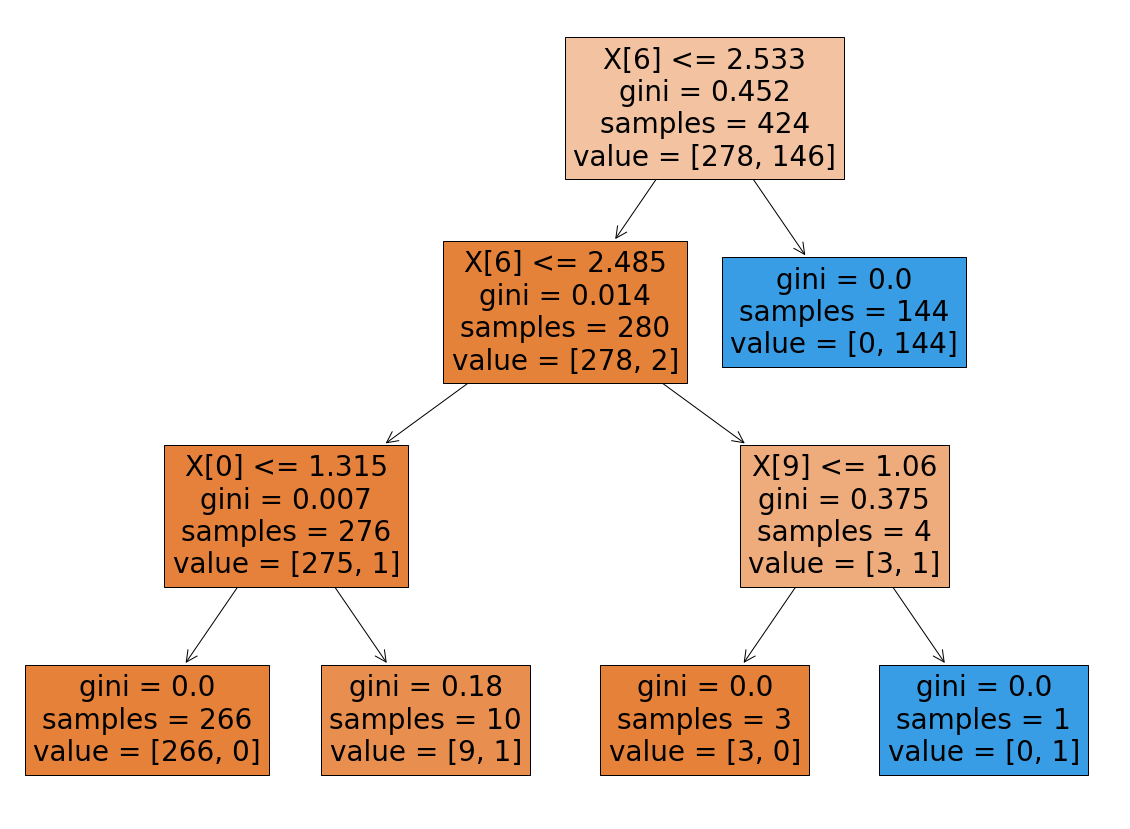

In [23]:

plt.figure(figsize=(20,15))
tree.plot_tree(clf0, filled=True)
plt.show()

## Random Forest Model Evaluation
In this we are using pre-pruning technique by fixing the max_depth and N_trees we have controlled the complexity of the decison tree. So that was the reason there was also no major Hyperparameter validation held



In [24]:
'''
Create 3 random forests classifiers corresponidng to 3 classes
'''
random_forest_0 = random_forest(X_train, y0_train, feature_set, n_trees= 10, n_features = 10, max_depth = depth)
random_forest_1 = random_forest(X_train, y1_train, feature_set, n_trees= 10, n_features = 10, max_depth = depth)
random_forest_2 = random_forest(X_train, y2_train, feature_set, n_trees= 10, n_features = 10, max_depth = depth)

'''
Get probability for each class
'''
train_prob_rf0 =predict_random_forest_output_prob(X_train ,random_forest_0)
train_prob_rf1 =predict_random_forest_output_prob(X_train ,random_forest_1)
train_prob_rf2 =predict_random_forest_output_prob(X_train ,random_forest_2)

'''
We have 3 probability outputs corresponding to each class.
Pick class which has the highest probablity assigned to it. 
'''
y_train_rf  = give_ovr_class_label_output(train_prob_rf0.reshape(train_row_size, 1), 
                                         train_prob_rf1.reshape(train_row_size, 1),
                                         train_prob_rf2.reshape(train_row_size, 1))

print('Random Forest Train 0-1 loss:', zero_one_loss(y_train, y_train_rf))
print('Random Forest Train 0-1 Accuracy:',np.mean(y_train == y_train_rf))



Random Forest Train 0-1 loss: 0.0047169811320754715
Random Forest Train 0-1 Accuracy: 0.9952830188679245


## Logistic Regression Model Evaluation

In [25]:
LR0 = LogisticRegression(solver='liblinear',verbose=0,random_state=42).fit(X_train, y0_train)
LR1 = LogisticRegression(solver='liblinear',verbose=0,random_state=42).fit(X_train, y1_train)
LR2 = LogisticRegression(solver='liblinear',verbose=0,random_state=42).fit(X_train, y2_train)

'''
Get probability for each class
'''
train_prob_lr0 = LR0.predict_proba(X_train)[:,1] # predict_proba provides probability for each class
train_prob_lr1 = LR1.predict_proba(X_train)[:,1] # predict_proba provides probability for each class
train_prob_lr2 = LR2.predict_proba(X_train)[:,1] # predict_proba provides probability for each class

'''
We have 3 probability outputs corresponding to each class.
Pick class which has the highest probablity assigned to it. 
'''

y_train_lr_sklean  = give_ovr_class_label_output(train_prob_lr0.reshape(train_row_size, 1), 
                                                 train_prob_lr1.reshape(train_row_size, 1),
                                                 train_prob_lr2.reshape(train_row_size, 1))

print('Train 0-1 loss:', zero_one_loss(y_train, y_train_lr_sklean))
print('Train 0-1 Accuracy:',np.mean(y_train == y_train_lr_sklean))

Train 0-1 loss: 0.06839622641509434
Train 0-1 Accuracy: 0.9316037735849056


## SVM Model Evaluation

In [26]:
SVM0 = SVC(verbose = False,probability=True, gamma = 'auto').fit(X_train, y0_train)
SVM1 = SVC(verbose = False,probability=True, gamma = 'auto').fit(X_train, y1_train)
SVM2 = SVC(verbose = False,probability=True, gamma = 'auto').fit(X_train, y2_train)

'''
Get probability for each class
'''
train_prob_svm0 = SVM0.predict_proba(X_train)[:,1] # predict_proba provides probability for each class
train_prob_svm1 = SVM1.predict_proba(X_train)[:,1] # predict_proba provides probability for each class
train_prob_svm2 = SVM2.predict_proba(X_train)[:,1] # predict_proba provides probability for each class

'''
We have 3 probability outputs corresponding to each class.
Pick class which has the highest probablity assigned to it. 
'''

y_train_svm_sklean  = give_ovr_class_label_output(train_prob_svm0.reshape(train_row_size, 1), 
                                                 train_prob_svm1.reshape(train_row_size, 1),
                                                 train_prob_svm2.reshape(train_row_size, 1))

print('Train 0-1 loss:', zero_one_loss(y_train, y_train_svm_sklean))
print('Train 0-1 Accuracy:',np.mean(y_train == y_train_svm_sklean))

Train 0-1 loss: 0.03773584905660377
Train 0-1 Accuracy: 0.9622641509433962


## MLP Model Evaluation

In [27]:
MLP0 = MLPClassifier(hidden_layer_sizes=(50,10),max_iter=1000,solver='adam',random_state=0, verbose = False,
                     learning_rate='adaptive',learning_rate_init=0.004).fit(X_train, y0_train)
MLP1 = MLPClassifier(hidden_layer_sizes=(50,10),max_iter=1000,solver='adam',random_state=0, verbose = False,
                     learning_rate='adaptive',learning_rate_init=0.004).fit(X_train, y1_train)
MLP2 = MLPClassifier(hidden_layer_sizes=(50,10),max_iter=1000,solver='adam',random_state=0, verbose = False,
                     learning_rate='adaptive',learning_rate_init=0.004).fit(X_train, y2_train)

'''
Get probability for each class
'''
train_prob_mlp0 = MLP0.predict_proba(X_train)[:,1] # predict_proba provides probability for each class
train_prob_mlp1 = MLP1.predict_proba(X_train)[:,1] # predict_proba provides probability for each class
train_prob_mlp2 = MLP2.predict_proba(X_train)[:,1] # predict_proba provides probability for each class

'''
We have 3 probability outputs corresponding to each class.
Pick class which has the highest probablity assigned to it. 
'''

y_train_mlp_sklean  = give_ovr_class_label_output(train_prob_mlp0.reshape(train_row_size, 1), 
                                                 train_prob_mlp1.reshape(train_row_size, 1),
                                                 train_prob_mlp2.reshape(train_row_size, 1))

print('Train 0-1 loss:', zero_one_loss(y_train, y_train_mlp_sklean))
print('Train 0-1 Accuracy:',np.mean(y_train == y_train_mlp_sklean))

Train 0-1 loss: 0.06839622641509434
Train 0-1 Accuracy: 0.9316037735849056


# Cross Validation

We are using cross validation for comparing the performance of various models. As size of sample is quite small, it makes sense to use K Fold cross validation instead of reserving a part of the training data for validation purpose. 

In **$k$-fold cross-validation** the data is split into a training set and a test set. Then the training set is randomly partitioned into $k$ subsets (folds). For each fold, the algorithm (for a fixed hyperparameter) is trained on the union of the other folds and then the error of its output is estimated using the fold. Finally, the average of all these errors is used to estimate the true error.

The cross-validation method often works well in practice. However, rigorously understanding the exact behaviour of cross-validation is still an open problem.

In the next example, let us utilize a ten-fold cross-validation on our data from before, and plot the loss and accuracy of different models for each cross validation fold

#### Running this code will take around 5 mins, Reduce the max_depth paramter for the function random_forest to make it run quicker

In [28]:
# Divide the training sample into 10 subsets of training and test da
cv = KFold(n_splits=10, random_state=42, shuffle=False)

y_trainmlp,y_trainsvm,y_trainlr,y_traindt,loss_mlp,loss_svm,loss_lr, loss_dt = [],[],[],[],[],[],[],[]
loss_rf ,y_trainrf= [], []
acc_mlp, acc_svm,acc_lr, acc_dt, acc_rf = [],[],[],[],[]
i =0

for train_index, test_index in cv.split(Xtrain_df):
    #    
    Xtrn,  Xtst = Xtrain_df.iloc[train_index], Xtrain_df.iloc[test_index]
    X_tr, X_te , y0_tr, y1_tr, y2_tr,y_tr,y_te  = create_ovr_test_data_set(Xtrn, Xtst)
    
    # Multilayer Perceptron
    MLP0.fit(X_tr, y0_tr)
    MLP1.fit(X_tr, y1_tr)
    MLP2.fit(X_tr, y2_tr)
    
    # Support Vector Machine 
    SVM0.fit(X_tr, y0_tr)
    SVM1.fit(X_tr, y1_tr)
    SVM2.fit(X_tr, y2_tr)
    
    # Logistic Regression
    LR0.fit(X_tr, y0_tr)
    LR1.fit(X_tr, y1_tr)
    LR2.fit(X_tr, y2_tr)
    
    # Descion Tree(SK Learn)
    clf0.fit(X_tr, y0_tr)
    clf1.fit(X_tr, y1_tr)
    clf2.fit(X_tr, y2_tr)
    
    # Random Forest
    rf0 = random_forest(X_tr, y0_tr, feature_set, n_trees= 1, n_features = 10, max_depth = depth)
    rf1 = random_forest(X_tr, y1_tr, feature_set, n_trees= 1, n_features = 10, max_depth = depth)
    rf2 = random_forest(X_tr, y2_tr, feature_set, n_trees= 1, n_features = 10, max_depth = depth)
                                   
    '''
    Predict test label probablity for 3 classifiers corresponding to 3 output classes
    '''  
    y_trainmlp.append(give_ovr_class_label_output(MLP0.predict_proba(X_te)[:,1].reshape(X_te.shape[0], 1),
                                                  MLP1.predict_proba(X_te)[:,1].reshape(X_te.shape[0], 1),
                                                  MLP2.predict_proba(X_te)[:,1].reshape(X_te.shape[0], 1)
                                                 ))
    y_trainsvm.append(give_ovr_class_label_output(SVM0.predict_proba(X_te)[:,1].reshape(X_te.shape[0], 1),
                                                  SVM1.predict_proba(X_te)[:,1].reshape(X_te.shape[0], 1),
                                                  SVM2.predict_proba(X_te)[:,1].reshape(X_te.shape[0], 1)
                                                 ))
    y_trainlr.append(give_ovr_class_label_output(LR0.predict_proba(X_te)[:,1].reshape(X_te.shape[0], 1),
                                                  LR1.predict_proba(X_te)[:,1].reshape(X_te.shape[0], 1),
                                                  LR2.predict_proba(X_te)[:,1].reshape(X_te.shape[0], 1)
                                                 ))
    y_traindt.append(give_ovr_class_label_output(clf0.predict_proba(X_te)[:,1].reshape(X_te.shape[0], 1),
                                                 clf1.predict_proba(X_te)[:,1].reshape(X_te.shape[0], 1),
                                                 clf2.predict_proba(X_te)[:,1].reshape(X_te.shape[0], 1)
                                                 ))
    y_trainrf.append(give_ovr_class_label_output(predict_random_forest_output_prob(X_te, rf0).reshape(X_te.shape[0], 1),
                                                 predict_random_forest_output_prob(X_te, rf1).reshape(X_te.shape[0], 1),
                                                 predict_random_forest_output_prob(X_te, rf2).reshape(X_te.shape[0], 1)
                                                 ))
    
    # Append loss value corresponding to each cross validation fold into a list
    loss_mlp.append(zero_one_loss(y_te, y_trainmlp[i]))
    loss_svm.append(zero_one_loss(y_te, y_trainsvm[i]))
    loss_lr.append(zero_one_loss(y_te, y_trainlr[i]))
    loss_dt.append(zero_one_loss(y_te, y_traindt[i]))
    loss_rf.append(zero_one_loss(y_te, y_trainrf[i]))
    
     # Append Accuracy corresponding to each cross validation fold into a list
    acc_mlp.append(np.mean(y_te == y_trainmlp[i]))
    acc_svm.append(np.mean(y_te == y_trainsvm[i]))
    acc_lr.append (np.mean(y_te == y_trainlr[i]))
    acc_dt.append (np.mean(y_te == y_traindt[i]))
    acc_rf.append (np.mean(y_te == y_trainrf[i]))
                                                                     
    print('\nMLPs Validation 0-1 loss:%f for fold %i' %(loss_mlp[i],i))
    print('SVMs Validation 0-1 loss:%f for fold %i' %(loss_svm[i],i))
    print('LRs  Validation 0-1 loss:%f for fold %i' %(loss_lr[i],i))
    print('DTs  Validation 0-1 loss:%f for fold %i' %(loss_dt[i],i))
    print('RFs  Validation 0-1 loss:%f for fold %i' %(loss_rf[i],i))
    
    print('MLP Validation 0-1 Accuracy: %f for fold %i' %(acc_mlp[i],i))
    print('SVM Validation 0-1 Accuracy:%f for fold %i' %(acc_svm[i],i))
    print('LR  Validation 0-1 Accuracy:%f for fold %i' %(acc_lr[i],i))
    print('DT  Validation 0-1 Accuracy:%f for fold %i' %(acc_dt[i],i))
    print('RF  Validation 0-1 Accuracy:%f for fold %i' %(acc_rf[i],i))
        
    i = i+1
    
    
                                                                     




MLPs Validation 0-1 loss:0.186047 for fold 0
SVMs Validation 0-1 loss:0.186047 for fold 0
LRs  Validation 0-1 loss:0.139535 for fold 0
DTs  Validation 0-1 loss:0.069767 for fold 0
RFs  Validation 0-1 loss:0.046512 for fold 0
MLP Validation 0-1 Accuracy: 0.813953 for fold 0
SVM Validation 0-1 Accuracy:0.813953 for fold 0
LR  Validation 0-1 Accuracy:0.860465 for fold 0
DT  Validation 0-1 Accuracy:0.930233 for fold 0
RF  Validation 0-1 Accuracy:0.953488 for fold 0

MLPs Validation 0-1 loss:0.139535 for fold 1
SVMs Validation 0-1 loss:0.093023 for fold 1
LRs  Validation 0-1 loss:0.093023 for fold 1
DTs  Validation 0-1 loss:0.000000 for fold 1
RFs  Validation 0-1 loss:0.023256 for fold 1
MLP Validation 0-1 Accuracy: 0.860465 for fold 1
SVM Validation 0-1 Accuracy:0.906977 for fold 1
LR  Validation 0-1 Accuracy:0.906977 for fold 1
DT  Validation 0-1 Accuracy:1.000000 for fold 1
RF  Validation 0-1 Accuracy:0.976744 for fold 1

MLPs Validation 0-1 loss:0.093023 for fold 2
SVMs Validation 0-1 

In [29]:
print('\nMLPs Cross Validation 0-1 loss:%f ' %(np.mean(np.stack( loss_mlp, axis=0 ))))
print('SVMs Cross Validation 0-1 loss:%f ' %(np.mean(np.stack( loss_svm, axis=0 ))))
print('LRs  Cross Validation 0-1 loss:%f ' %(np.mean(np.stack( loss_lr, axis=0 ))))
print('DTs  Cross Validation 0-1 loss:%f ' %(np.mean(np.stack( loss_dt, axis=0 ))))
print('RFs  Cross Validation 0-1 loss:%f ' %(np.mean(np.stack( loss_rf, axis=0 ))))

print('\nMLPs Cross Validation 0-1 accuracy:%f ' %(np.mean(np.stack( acc_mlp, axis=0 ))))
print('SVMs Cross Validation 0-1 accuracy:%f ' %(np.mean(np.stack( acc_svm, axis=0 ))))
print('LRs  Cross Validation 0-1 accuracy:%f ' %(np.mean(np.stack( acc_lr, axis=0 ))))
print('DTs  Cross Validation 0-1 accuracy:%f ' %(np.mean(np.stack( acc_dt, axis=0 ))))
print('RFs  Cross Validation 0-1 accuracy:%f ' %(np.mean(np.stack( acc_rf, axis=0 ))))


MLPs Cross Validation 0-1 loss:0.160078 
SVMs Cross Validation 0-1 loss:0.136877 
LRs  Cross Validation 0-1 loss:0.070653 
DTs  Cross Validation 0-1 loss:0.016445 
RFs  Cross Validation 0-1 loss:0.023643 

MLPs Cross Validation 0-1 accuracy:0.839922 
SVMs Cross Validation 0-1 accuracy:0.863123 
LRs  Cross Validation 0-1 accuracy:0.929347 
DTs  Cross Validation 0-1 accuracy:0.983555 
RFs  Cross Validation 0-1 accuracy:0.976357 


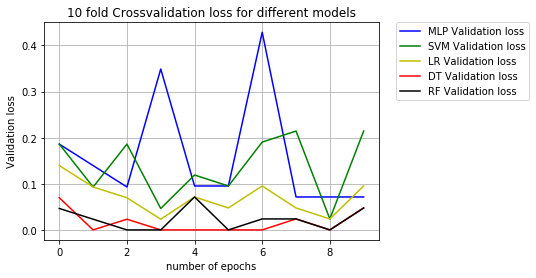

In [30]:
epochs = range(0, 10)
plt.plot(epochs, loss_mlp, 'b', label='MLP Validation loss')

plt.plot(epochs, loss_svm, 'g', label='SVM Validation loss')

plt.plot(epochs, loss_lr, 'y', label='LR Validation loss')

plt.plot(epochs, loss_dt, 'r', label='DT Validation loss')

plt.plot(epochs, loss_rf, 'black', label='RF Validation loss')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel('number of epochs')
plt.ylabel('Validation loss')
plt.title('10 fold Crossvalidation loss for different models')
plt.grid(True)


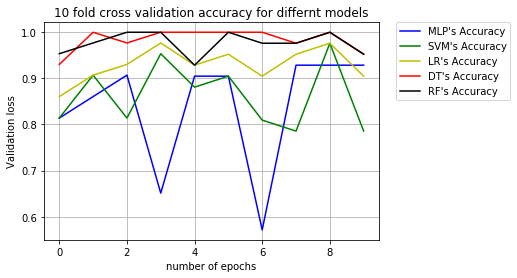

In [31]:
epochs = range(0, 10)

plt.plot(epochs, acc_mlp, 'b', label='MLP\'s Accuracy')

plt.plot(epochs, acc_svm, 'g',  label='SVM\'s Accuracy')

plt.plot(epochs, acc_lr, 'y',  label='LR\'s Accuracy')

plt.plot(epochs, acc_dt, 'r',  label='DT\'s Accuracy')
plt.plot(epochs, acc_rf, 'black',  label='RF\'s Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.xlabel('number of epochs')
plt.ylabel('Validation loss')
plt.title('10 fold cross validation accuracy for differnt models')
plt.grid(True)

# Testing

Validation results prove that Decision Tree(SK Learn) is the best performing model. Following is the test result:

In [32]:
test_prob_clf0 = clf0.predict_proba(X_test)[:,1] # predict_proba provides probability for each class
test_prob_clf1 = clf1.predict_proba(X_test)[:,1] # predict_proba provides probability for each class
test_prob_clf2 = clf2.predict_proba(X_test)[:,1]

'''
We have 3 probability outputs corresponding to each class.
Pick class which has the highest probablity assigned to it. 
'''
y_test_dt_sk  = give_ovr_class_label_output(test_prob_clf0.reshape(test_row_size, 1), 
                                         test_prob_clf1.reshape(test_row_size, 1),
                                         test_prob_clf2.reshape(test_row_size, 1))

print('Test 0-1 loss:', zero_one_loss(y_test, y_test_dt_sk))
print('Test 0-1 Accuracy:',np.mean(y_test == y_test_dt_sk))

Test 0-1 loss: 0.02666666666666667
Test 0-1 Accuracy: 0.9733333333333334


### Plot Confusion Matrix

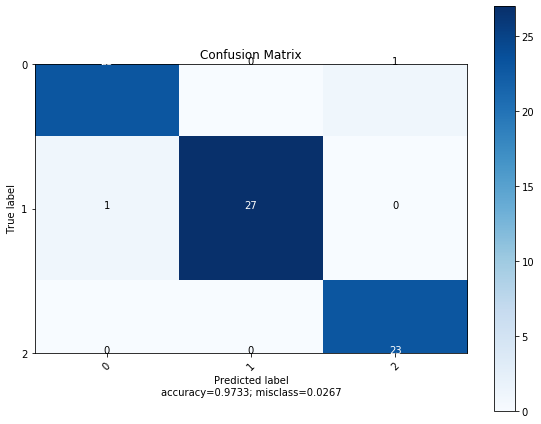

In [33]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

cm = confusion_matrix(y_test,y_test_dt_sk)
plot_confusion_matrix(cm,normalize    = False,
                      target_names = set(y_test),
                      title        = "Confusion Matrix")

## Conclusion
 - Decision Tree(SK Learn) has the best performance on the cross validation, closely follwed by Random Forest
 - Test Performance for the selected model is 97.33 percent. 
 - Confusion matrix diagonal elements repersents the labels which are correctly idenfied. 
 - As can be seen from the confusion matrix, most of the labels are correctly classfied. 
 - 2 labels are incorrectly classfied, class 1 is prediced as 0, class 1 is predicted as 2
 - Results might be littld different when the notebook is run for the evaluation purpose. Errors may fall in other regions instead of the two regions mentioned above